## OB1 performance on the flanker task and the sentence task

In [1]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

### Analysis OB1 activation on Flanker Experiment

In [11]:
df = pd.read_pickle("/Users/pleunvaartjes/Documents/python/VU_werk/OB1_general_map/OB1_SAM/Results/alldata_EmbeddedWords.pkl")
df = pd.DataFrame(df) #NV: had to add this. Pandas probably changed syntax in an update, causing an error without this line
df.head(-30)

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,...,word threshold,word frequency,word predictability,reaction time,correct,position,inhibition_value,wordlen_threshold,error_rate,item_nr
0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,1
1,tight,tighten,tight,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,2
2,box,boxer,box,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,3
3,own,owner,own,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,4
4,farm,farmer,farm,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,add,address,add,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[350],[1],[],-0.0015,0.15,0.0,98
98,tea,tease,tea,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,,0,[375],[1],[],-0.0015,0.15,0.0,99
99,pill,pillow,pill,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[350],[1],[],-0.0015,0.15,0.0,100
100,drag,dragon,drag,non suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,,0,[375],[1],[],-0.0015,0.15,0.0,101


In [12]:
behav2plot = df.copy(deep=True)
behav2plot['condition'] = behav2plot['condition'].str[5:] #NV: remove "word/"

behav2plot['RT'] = behav2plot['reaction time'].str[0]
behav2plot['correct'] = behav2plot['correct'].str[0]

conditiondict = {"no": "no-flank", "related":"repetition"}
behav2plot["condition"].replace(conditiondict, inplace=True)
behav2plot.head(-30)


,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,...,word frequency,word predictability,reaction time,correct,position,inhibition_value,wordlen_threshold,error_rate,item_nr,RT
0,weak,weaken,weak,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,1,375
1,tight,tighten,tight,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,2,375
2,box,boxer,box,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,3,375
3,own,owner,own,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,4,375
4,farm,farmer,farm,suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,5,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,add,address,add,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[350],1,[],-0.0015,0.15,0.0,98,350
98,tea,tease,tea,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1,...,,0,[375],1,[],-0.0015,0.15,0.0,99,375
99,pill,pillow,pill,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[350],1,[],-0.0015,0.15,0.0,100,350
100,drag,dragon,drag,uffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[2.4177670493459256, 2.4177670493459256, 2.417...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",2,...,,0,[375],1,[],-0.0015,0.15,0.0,101,375


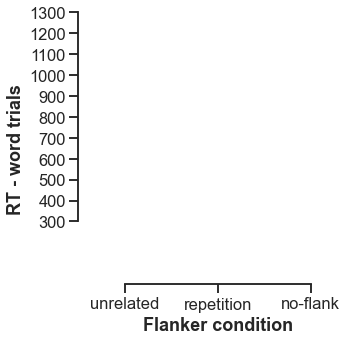

In [13]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


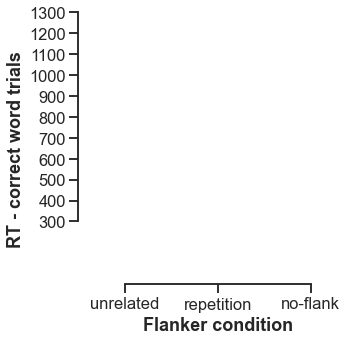

In [14]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))
cor2plot = behav2plot.copy(deep=True)
cor2plot = cor2plot[cor2plot['correct']==1]

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=cor2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=cor2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - correct word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


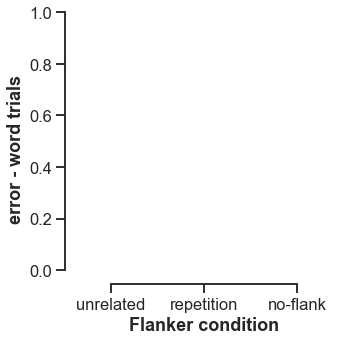

In [15]:
error = {1:0, 0:1}
behav2plot['error'] = behav2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="error",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="error", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)
ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("error - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([0, 0.2, 0.4,0.6, 0.8, 1.0])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Plot target and lexicon activations in the model 

In [16]:
target2plot = df.copy(deep=True)
#data2plot = data2plot[data2plot['condition'].str.startswith(('word'))]

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci='sd',  linewidth=3, palette=["yellow", "blue", "coral"], legend=False)

ax.set_title("Target activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



ValueError: Length of values (23040) does not match length of index (3611)

### Lexicon activations 

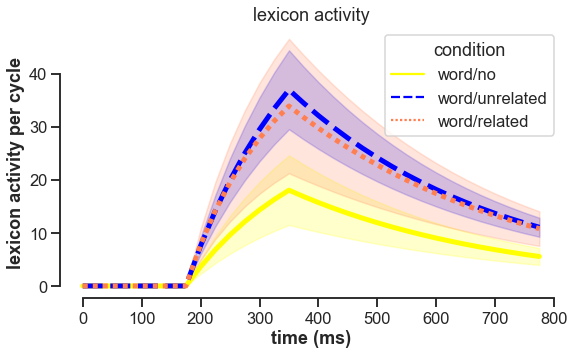

In [8]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle",hue = "condition", style= "condition",color ='black' , ci='sd',  linewidth=5,palette=["yellow", "blue", "coral"], legend=True)

ax.set_title("lexicon activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



In [9]:
lexicon2plot.head(2)
lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

,trial,stimulus,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,cycle nr,time,bin
16,0,lent,lent,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.046356,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.13337968354209412, 0.13337968354209412, 0.1...","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, ...",2,2,0.765156,0.961421,0,[625],[1],[],16,400,3
48,1,ment drap ment,drap,word/unrelated,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",23.238400,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05584062249291546, 0.05584062249291546, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 12, 12, 12, 12, 12, 1...",7,7,0.779450,0.567026,0,[625],[1],[],16,400,5
80,2,dire dire dire,dire,word/related,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",43.298923,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05584062249291546, 0.05584062249291546, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, ...",7,7,0.683716,3.208565,0,[500],[1],[],16,400,10


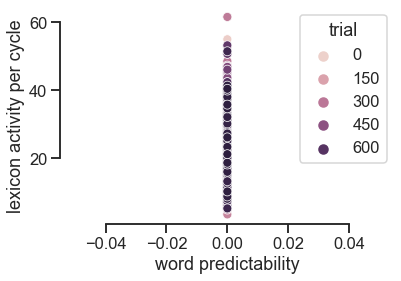

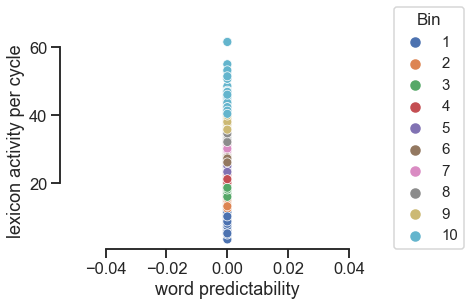

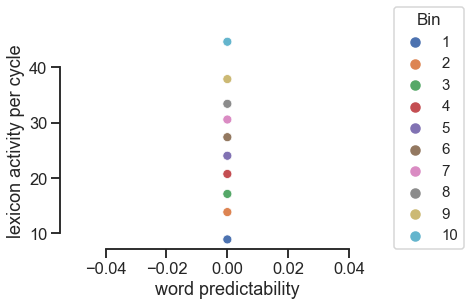

In [10]:

sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/OB1_dataFlankerlexicon.pkl')
lexicon_peak.head(3)

### bigram activations 

In [17]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



ValueError: Length of values (23040) does not match length of index (3611)

In [18]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition", style="condition",color ='black' , ci='sd',  linewidth=3,
             palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




ValueError: Length of values (23040) does not match length of index (3611)